<a href="https://colab.research.google.com/github/PedestrianCrossing/Nordwood/blob/main/Hair_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#setting up fastai
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
from fastai.metrics import accuracy

In [5]:
! git clone https://github.com/PedestrianCrossing/Nordwood.git

Cloning into 'Nordwood'...
remote: Enumerating objects: 412, done.
remote: Total 412 (delta 0), reused 0 (delta 0), pack-reused 412
Receiving objects: 100% (412/412), 24.94 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [6]:
PATH = '/content/Nordwood'

In [7]:
np.random.seed(24)
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(PATH, valid_pct=0.2, ds_tfms=tfms, size=299, bs=16).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]


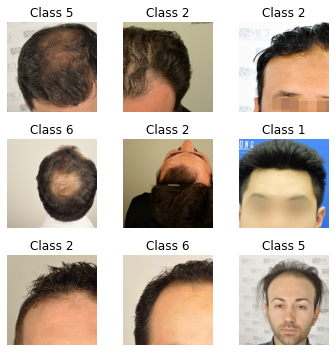

In [8]:
data.show_batch(rows=3, figsize=(5, 5))

In [9]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.341895,2.334621,0.415584,08:08
1,1.982798,2.774803,0.389610,08:00
2,1.565605,2.491361,0.480519,08:05
3,1.293793,2.239098,0.519481,08:09


In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


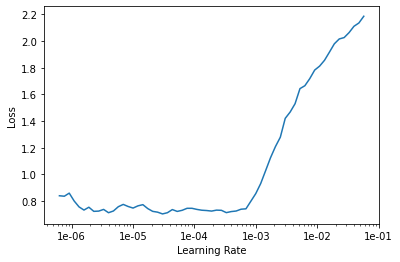

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(4, max_lr=slice(3e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.686035,1.997777,0.532468,11:09
1,0.655914,2.094519,0.506494,11:07
2,0.578265,1.995687,0.545455,11:18
3,0.492864,1.894194,0.571429,11:08


In [14]:
learn.save('stage-1')

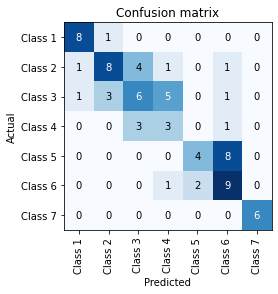

In [15]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

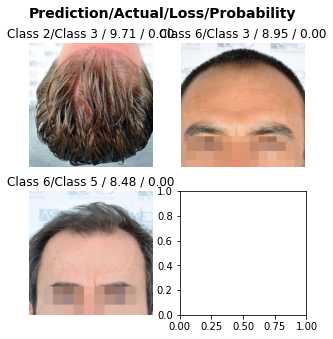

In [16]:
interpret.plot_top_losses(3, figsize=(5,5))

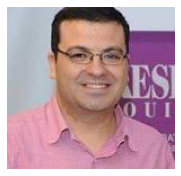

In [18]:
IMAGEPATH='/content/test_image1.jpg'
image = open_image(IMAGEPATH)
image.show()

In [19]:
learn.predict(image)

(Category tensor(0),
 tensor(0),
 tensor([9.6080e-01, 2.9184e-03, 1.2021e-04, 6.5590e-07, 1.2210e-04, 6.5955e-03,
         2.9447e-02]))